In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from collections import Counter

%matplotlib inline

# Problem 1: plot the CCDF

In [3]:
#get data:
data = pd.read_csv('vocab_cs_mod.txt',delimiter=' ', header=None,names=[0,1])
p = np.divide(data[1],np.sum(data[1]))

In [4]:
len(data)

238591

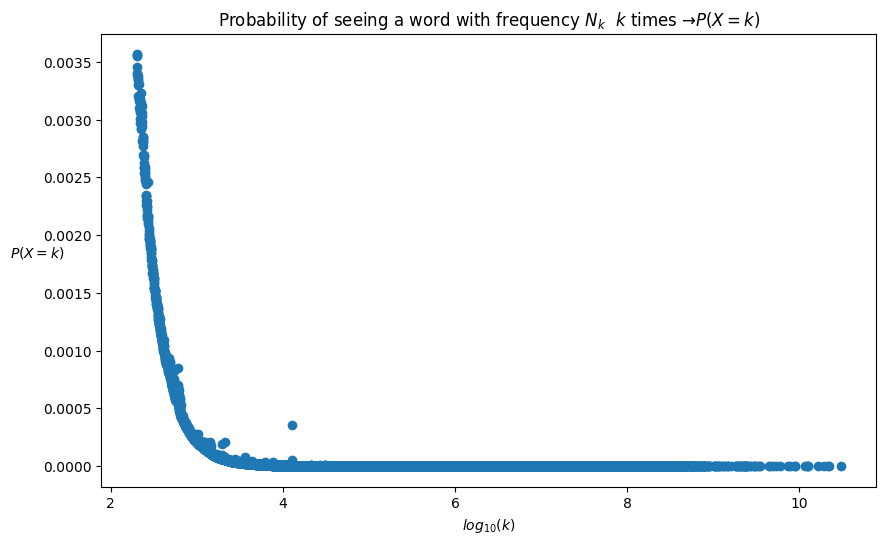

In [5]:
#Plot:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.title(r'Probability of seeing a word with frequency $N_k\ $ $k$ times $\to P(X=k)$')
plt.plot(np.log10(data[0]),p, 'o')
plt.xlabel(r'$log_{10}(k)$')
plt.ylabel(r'$P(X=k)$',rotation='horizontal')
plt.show()

In [6]:
#find the cdf
cdf = np.cumsum(p[::-1])
ccdf= np.subtract(1,cdf)

C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


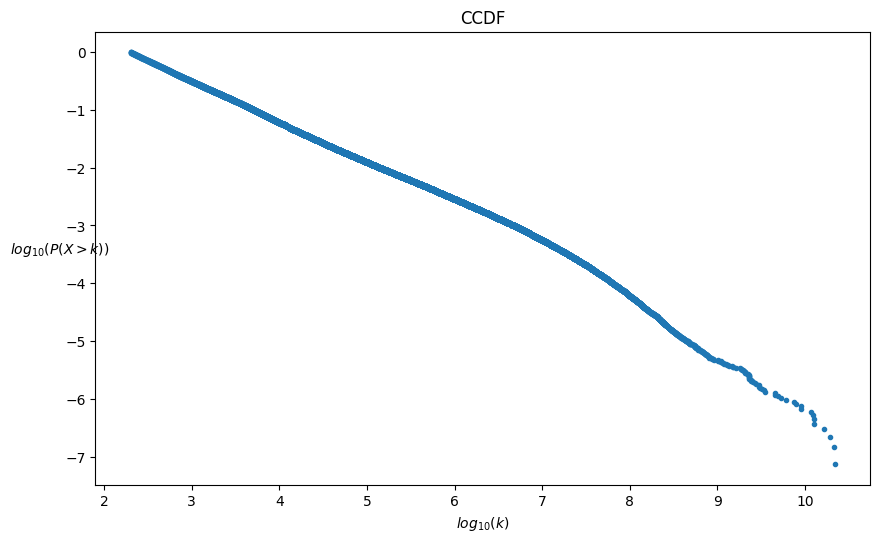

In [7]:
#Plot:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.title(r'CCDF')
plt.plot(np.log10(data[0][::-1]),np.log10(ccdf), '.')
plt.xlabel(r'$log_{10}(k)$')
plt.ylabel(r'$log_{10}(P(X>k))$',rotation='horizontal')
plt.show()

In [8]:
#append ccdf to dataframe:
data['ccdf'] = ccdf

#create masked data:
mask1 = np.log10(data[0])<4.3
mask2 = np.log10(data[0])>7

In [9]:
data_1 = data[mask1]
data_2 = data[mask2]



In [10]:
x1 = np.linspace(2.5, 6,1000)
x2 = np.linspace(6.5,11,1000)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(np.log10(data_1[0]), np.log10(data_1['ccdf']))
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(np.log10(data_2[0][1:-1]), np.log10(data_2['ccdf'][1:-1]))
y1 = slope1*x1 + intercept1
y2 = slope2*x2 + intercept2

C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


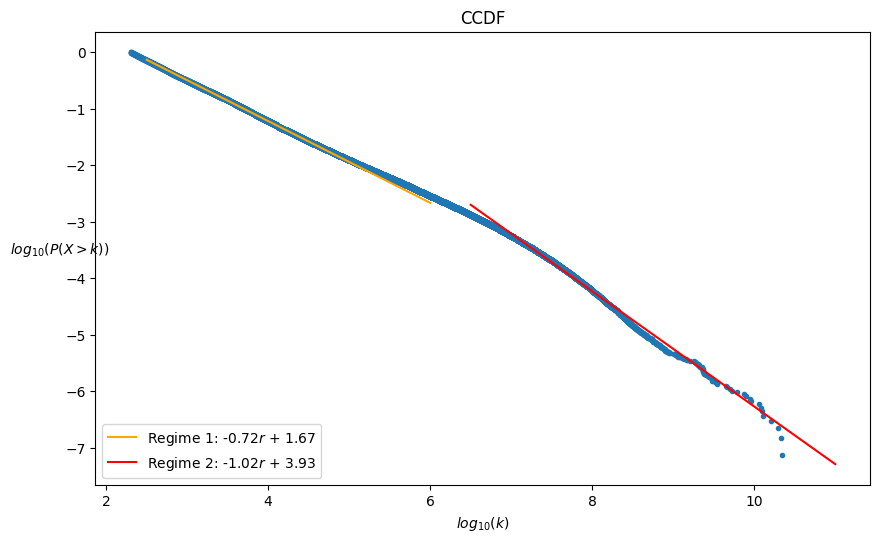

In [11]:
#Plot:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.title(r'CCDF')
plt.plot(np.log10(data[0][::-1]),np.log10(ccdf), '.', label='')
plt.plot(x1,y1, color='orange',label=r'Regime 1: {}$r$ + {}'.format(round(slope1,2),round(intercept1,2)))
plt.plot(x2,y2, color='red', label=r'Regime 2: {}$r$ + {}'.format(round(slope2,2),round(intercept2,2)))
plt.xlabel(r'$log_{10}(k)$')
plt.ylabel(r'$log_{10}(P(X>k))$',rotation='horizontal')
plt.legend(loc='lower left')
plt.show()

In [12]:
R1_interval = (slope1-(1.96*std_err1),slope1+(1.96*std_err1)
R2_interval = (slope2-(1.96*std_err2),slope2+(1.96*std_err2))

SyntaxError: invalid syntax (<ipython-input-12-05a76d56bdb3>, line 2)

In [13]:
print(round(R1_interval[0],5),round(R1_interval[1],5))
print(round(R2_interval[0],5),round(R2_interval[1],5))

NameError: name 'R1_interval' is not defined

# Problem 3:  Zipf's Law

In [14]:
#Get the data:
raw_data = np.loadtxt('google_vocab_rawwordfreqs.txt.gz')

In [15]:
len(raw_data)

13588391

In [16]:
unique = sorted(raw_data,reverse=True)

In [17]:
len(unique)

13588391

In [18]:
y3 = [i for i in range(len(unique))]

C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


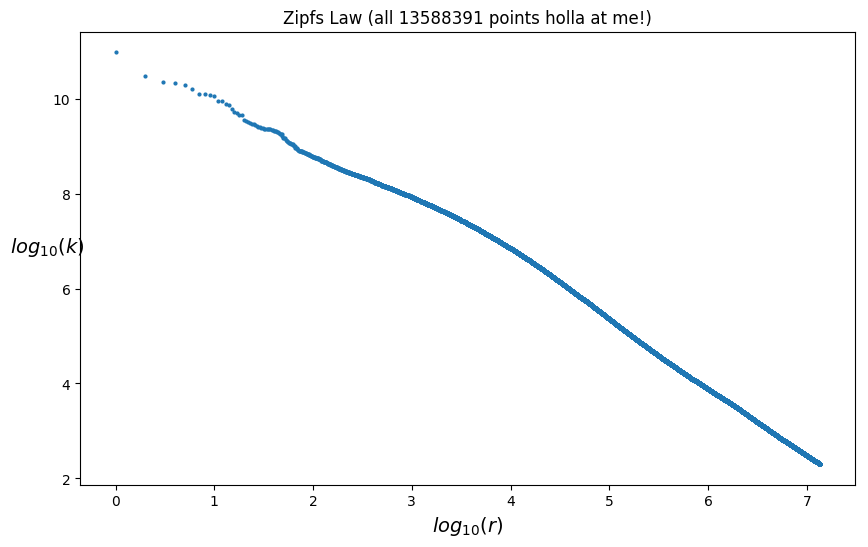

In [19]:
#Plot:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.title(r'Zipfs Law (all 13588391 points holla at me!)')
plt.plot(np.log10(y3), np.log10(unique),  'o', markersize=2)
plt.xlabel(r'$log_{10}(r)$',fontsize=14)
plt.ylabel(r'$log_{10}(k)$',rotation='horizontal',fontsize=14)
plt.show()

In [20]:
combined = pd.DataFrame(unique,y3)

In [21]:
combined['r'] = y3

In [22]:
z1 = combined[np.log10(combined[0])<4.3]
z2 = combined[np.log10(combined[0])>7]

In [23]:
x2 = np.linspace(0, 4.3,1000)
x1 = np.linspace(4.3,8,1000)
slope11, intercept11, r_value11, p_value11, std_err11 = stats.linregress(np.log10(z1['r'][1:]), np.log10(z1[0][1:]))
slope22, intercept22, r_value22, p_value22, std_err22 = stats.linregress(np.log10(z2['r'][1:]), np.log10(z2[0][1:]))
y1 = slope11*x1 + intercept11
y2 = slope22*x2 + intercept22

C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


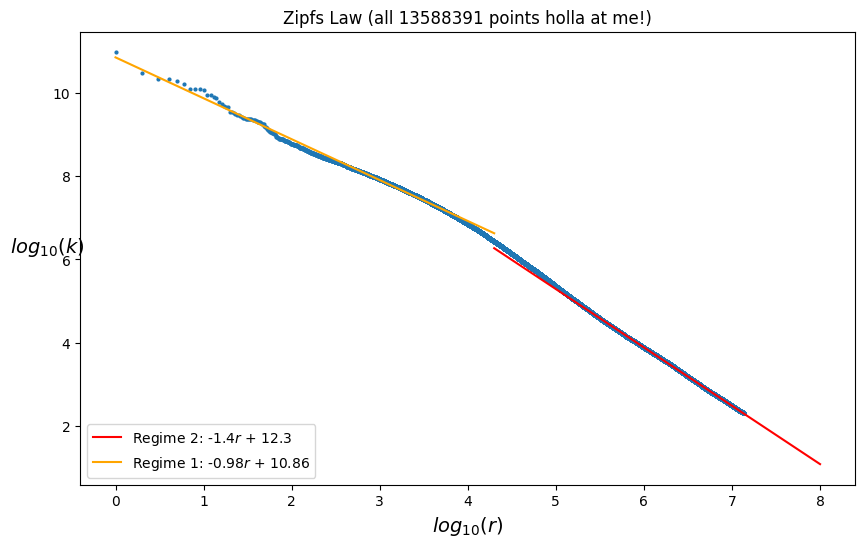

In [24]:
#Plot:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.title(r'Zipfs Law (all 13588391 points holla at me!)')
plt.plot(np.log10(y3), np.log10(unique),  'o', markersize=2, label='')
plt.plot(x1,y1, color='red', label=r'Regime 2: {}$r$ + {}'.format(round(slope11,2),round(intercept11,2)))
plt.plot(x2,y2, color='orange', label=r'Regime 1: {}$r$ + {}'.format(round(slope22,2),round(intercept22,2)))
plt.xlabel(r'$log_{10}(r)$',fontsize=14)
plt.ylabel(r'$log_{10}(k)$',rotation='horizontal',fontsize=14)
plt.legend(loc='lower left')
plt.show()

In [25]:
R1_interval_1 = (slope11-(1.96*std_err11),slope11+(1.96*std_err11))
R2_interval_2 = (slope22-(1.96*std_err22),slope22+(1.96*std_err22))

In [26]:
print(round(R1_interval_1[0],5),round(R1_interval_1[1],5))
print(round(R2_interval_2[0],5),round(R2_interval_2[1],5))

-1.40286 -1.40284
-0.9849 -0.98176


In [27]:
alpha1 = 1/(slope2)

In [28]:
alpha1

-0.98086998572096262

In [29]:
alpha2 = 1/(slope1)

In [30]:
alpha2

-1.3829338212944979

In [31]:
alpha11 = 1/(slope11)
alpha22 = 1/(slope22)

In [32]:
alpha11

-0.71283477053688449

In [33]:
alpha22

-1.0169518741967778